# Trabajo Final: Metodos Cuantitativos Aplicados a Estudios Urbanos

Profesor Ricardo Pasquini \
Universidad Torcuato Di Tella \
[rpasquini@utdt.edu](rpasquini@utdt.edu)

En este trabajo final vamos a analizar posibles determinantes del valor de los terrenos en CABA. En particular, vamos a analizar  cuestiones relacionadas a la regulación constructiva.

Los datos fueron compilados del sitio [Buenos Aires Data](https://data.buenosaires.gob.ar/). Si bien utilizarán esta base de datos para los fines del trabajo práctico, no deben utilizar estos datos investigación, ya que el procedimiento que se utilizó para combinar los datos debe revisarse y podría presentar errores o inconsistencias.  


**Importante:**

* El trabajo se realiza en grupos de hasta 2 personas.
* Las instrucciones para registrar su trabajo están en el sitio del campus UTDT de la materia. Deben buscar Trabajo Final 2023.
* La entrega se realiza exclusivamente mediante el Campus UTDT.
* Para responder a las preguntas agregue celdas de código y texto al notebook.


In [2]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 29.1 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import statsmodels.api as sm

In [4]:
#Levantando los datos a un geodataframe
gdf=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/metodos_cuantitativos/raw/main/data/terrenos_2020_cregu_parcelas.zip")

# Un primer vistazo de los datos
Utilice el siguiente código para mapear sus datos (no es necesario hacer cambios en el código)

(-58.536700402460426,
 -58.3460615293704,
 -34.702178286661066,
 -34.53226349546769)

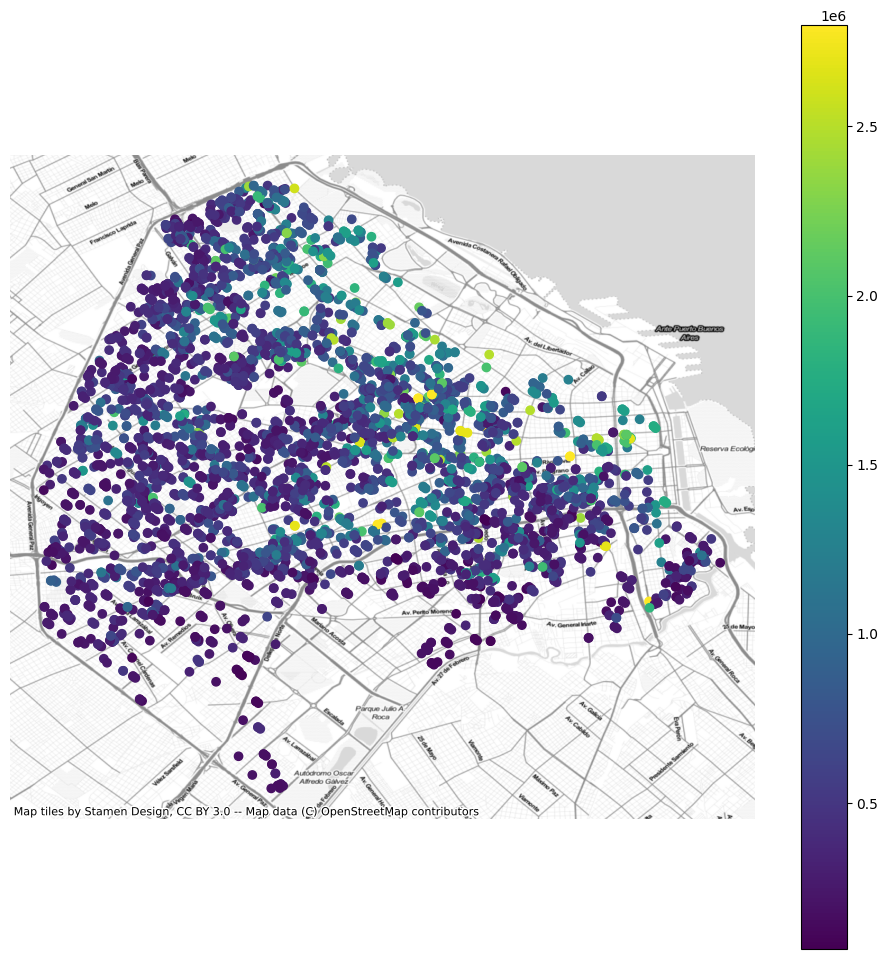

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs("EPSG:4326").plot(ax=ax,column='PRECIOUSD', legend=True)
#ax.set_xlim(-59.2, -58)
#ax.set_ylim(-35, -34.1)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=4326).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')
#plt.title(ciudad)

### Descripcion de campos
| campo      | tipo    | descripcion                                                                                                                                                                                             |
| ---------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SUPERFICIE       | int  | Superficie en m2     
| PRECIOUSD | int  | Precio terreno en USD
| COTIZACION |	int | Cotizacion del USD en pesos
| TRIMESTRE | string | Trimestre
| BARRIO	 | string | Barrio
| COMUNA | int | Nro de Comuna
| smp1       | string  | Corresponde al número de identificación de la Sección-Manzana-Parcela                                                                                                                                   |
| sm         | string  | Corresponde al número de identificación de la Sección-Manzana              |
| uni_edif_1 | number  | Unidad de edificabilidad 1: define la altura máxima aplicable a cada Unidad de la Ciudad de Buenos Aires
| plusvalia | number  | Estimación de la plusvalia que debería pagar el desarrollador si aprovechase la máxima capacidad constructiva

# Pregunta 1

Suponga que el valor al que se oferta un terreno puede modelarse de la siguiente manera:

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\epsilon_i$$

Le llamaremos a este modelo el MODELO 1.  


1. Estime el modelo.

2. Interprete el valor de $\hat{\beta_0}$ y  $\hat{\beta_1}$.

3. Proponga un test de hipótesis para comprobar si la superficie tiene un efecto en el valor de oferta de un terreno.

4. Evalue la bondad de ajuste del modelo. Proponga una medida e interprete los resultados de la estimación del modelo de regresión.


# Pregunta 2

Suponga el siguiente modelo alternativo para el valor de los terrenos (MODELO 2):

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\beta_2\textit{uni_edif_1}_i+\epsilon_i$$

Donde *uni_edif_1* es la altura maxima que puede construirse en el terreno *i*.

1. Estime el modelo. Interprete los coeficientes estimados.

2. Interprete el valor de  $\hat{\beta_0}$, $\hat{\beta_1}$ y de  $\hat{\beta_2}$. En particular, discuta si la interpretación de $\hat{\beta_1}$ es similar (o no) a la realizada en el caso del MODELO 1.

3. Identifique en qué medida el MODELO 2 provee una mejor explicación a los precios de los terrenos.

# Pregunta 3
Considere el siguiente modelo (MODELO 3):

$$PrecioUSD_i=\beta_0+\beta_1\textit{0.8*Superficie*uni_edif_1}_i+\epsilon_i$$

Donde la medida $\textit{0.8*Superficie*uni_edif_1}$ es una aproximación a la superficie edificable en el terreno.

1. Proponga una método para estimar $\beta_1$
2. Provea una interpretación para  $\hat{\beta_1}$.
3. Identifique en qué medida el MODELO 3 provee un mejor ajuste de los datos que el MODELO 2.

# Pregunta 4

1.  Analice graficamente el cumplimiento del supuesto normalidad de los errores utilizando los resultados de la estimación de  regresión.
  *Nota:* Puede realizar este análisis en base a cualquiera de los 3 MODELOS estimados. Elija el que prefiera
  

2. ¿Pueden considerarse válido un test de hipótesis como el realizado en el punto 1.3 en este caso particular? ¿Por qué sí o por qué no?



# Pregunta 5
1. Usando los datos disponibles, proponga un modelo para analizar el efecto de la incorporación de la localización como variable explicativa del precio de los terrenos. Ayuda: Puede utilizar la comuna o el barrio. ¿En qué medida  la localización es relevante para explicar los precios de los terrenos?
2. Proponga un test para identificar si los terrenos ubicados en la Comuna 5  (Almagro, Boedo) presentan menor valor que los de la Comuna 1 (Retiro, San Nicolás). Explique los resultados.

# Pregunta 6

1. La variable 'plusvalia' presenta una estimación de lo que el desarrollador de un terreno debería pagar al Gobierno si va a aprovechar la constructividad adicional que le otorgó el nuevo código de edificación. Suponga que su hipótesis de investigación es que la captación de plusvalía por parte del Gobierno reduce el valor de oferta de un terreno, ya que los desarrolladores querrían pagar menos por un terreno por el cuál deberán pagar más plusvalía.  Proponga y estime un modelo para identificar la hipótesis en cuestión. Explique sus resultados

 *Nota:* A los fines de esta pregunta puede trabajar con su modelo de preferencia (MODELO 1, MODELO 2, o MODELO 3) y modificarlo apropiadamente.